#### CSV파일을 Pandas DataFrame으로 받기

In [106]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/jivel/Desktop/netflix_titles-Data_analysis/netflix_titles.csv')

frame = pd.DataFrame(data)

frame.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25.Sep.21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24.Sep.21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24.Sep.21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24.Sep.21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24.Sep.21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [107]:
#각 데이터 컬럼들의 정보
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1000 non-null   object
 1   type          1000 non-null   object
 2   title         1000 non-null   object
 3   director      685 non-null    object
 4   cast          903 non-null    object
 5   country       694 non-null    object
 6   date_added    1000 non-null   object
 7   release_year  1000 non-null   int64 
 8   rating        1000 non-null   object
 9   duration      1000 non-null   object
 10  listed_in     1000 non-null   object
 11  description   1000 non-null   object
dtypes: int64(1), object(11)
memory usage: 93.9+ KB


In [108]:
#결측치 수 확인
frame.isna().sum()

show_id           0
type              0
title             0
director        315
cast             97
country         306
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [109]:
frame = frame.drop(['director', 'cast'], axis=1)

frame.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [110]:
#사용하지 않고, 결측치가 있는 directior, cast 컬럼 drop
frame.isna().sum()

show_id           0
type              0
title             0
country         306
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [111]:
#결측치를 최빈값으로 채우기
frame['country'] = frame['country'].fillna(frame['country'].mode()[0])

In [118]:
#결측치가 없음을 확인
frame.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### 연도를 입력받고, 입력받은 연도의 출시 작품 수를 출력

In [120]:
year = int(input())
find = frame.loc[(frame['release_year'] == year)]
print(year)
print(len(find.index))

2020
91


#### 연도별 작품의 수를 막대 그래프로 나타내기

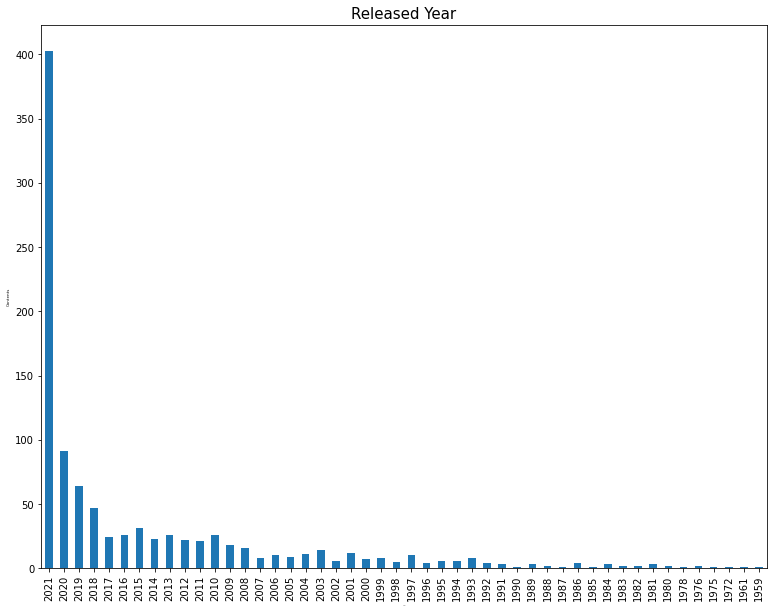

In [114]:
import matplotlib.pyplot as plt

data = frame["release_year"].value_counts()

data.sort_index(ascending=False).plot(kind='bar',figsize=(13, 10))

plt.title("Released Year", fontsize=15)
plt.ylabel("Contents", fontsize=4)
plt.xlabel("Year", fontsize=1)

plt.show()

#### 작품의 수가 많은 순서대로 나라(Country)를 출력

In [115]:
#한 작품에 여러 국가에서 제공이 되어있다. 그래서 영화 내에서 국가를 분리하는 작업을 했다.
#이미 결측치는 최빈값으로 설정해놨기 때문에 국가만 분리하여 작품수가 많은 국가를 차례대로 출력했다.
country = frame.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

for i in country.value_counts().index:
    print(i)

United States
United Kingdom
India
Canada
Japan
France
Germany
Australia
Nigeria
Spain
Turkey
South Korea
Italy
Mexico
China
Argentina
South Africa
Belgium
Thailand
New Zealand
Brazil
Colombia
Taiwan
Lebanon
Romania
United Arab Emirates
Denmark
Israel
Egypt
Hong Kong
Netherlands
Singapore
Czech Republic
Russia
Indonesia
Philippines
Poland
Sweden
Ireland
Syria

Bulgaria
Switzerland
Vietnam
Finland
Ghana
Algeria
Qatar
Malaysia
Burkina Faso
Hungary
Nepal
Venezuela
Ethiopia
Norway
Mauritius
Jordan
Saudi Arabia
Kuwait
Greece
Austria
Iceland


#### 해당 나라에서 출시한 작품의 수를 나라의 이름와 함께 각각 출력

In [116]:
country.value_counts().sort_values(ascending=False)

United States     691
United Kingdom     68
India              61
Canada             39
Japan              35
                 ... 
Burkina Faso        1
Qatar               1
Algeria             1
Ghana               1
Iceland             1
Length: 62, dtype: int64